##### Song Analyzer - Britney Spears, 50 Cent

Data is already clean for 50 Cent and ready in a file
Data Form Britney must be cleaned and formated in first step

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import time

Step 1: import 50_cent df (scraped in other notebook)

In [7]:
df_fifty = pd.read_csv('fifty.csv')
df_fifty.drop('song_name', axis=1, inplace=True)
df_fifty.drop('Unnamed: 0', axis=1, inplace=True)
df_fifty

,lyrics_row,artist_name
0,"Yeah, I was born a misfit, grew up ten miles f...",50 Cent
1,"Wanted to make it big, I wished it to existence",50 Cent
2,"I never was a sick kid, always dismissed quick",50 Cent
3,"""Stick to singing, stop rappin'"", like it's Ch...",50 Cent
4,"And if you're talkin' money, then my conversat...",50 Cent
...,...,...
22976,Y'all don't do it how we do,50 Cent
22977,Niggas ain't on the shit we on,50 Cent
22978,Everything new,50 Cent
22979,Spikes on the Louis Vuittons,50 Cent


Step 2: import Britney df (scraped by another student) and edit to match format of 50_df

In [2]:
df = pd.read_csv('britney.csv')
df

,Unnamed: 0,lyrics text,Artist
0,0,"Oh baby, baby",Britney spears
1,1,"Oh baby, baby",Britney spears
2,2,"Oh baby, baby, how was I supposed to know",Britney spears
3,3,That something wasn't right here,Britney spears
4,4,"Oh baby, baby, I shouldn't have let you go",Britney spears
...,...,...,...
19970,19970,I'll fly away on a trip to your heart,Britney spears
19971,19971,Break these chains that keep us apart,Britney spears
19972,19972,I'll fly away on a trip to your heart,Britney spears
19973,19973,Oh oh oh oh oh oh oh oh,Britney spears


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,lyrics text,Artist
0,"Oh baby, baby",Britney spears
1,"Oh baby, baby",Britney spears
2,"Oh baby, baby, how was I supposed to know",Britney spears
3,That something wasn't right here,Britney spears
4,"Oh baby, baby, I shouldn't have let you go",Britney spears
...,...,...
19970,I'll fly away on a trip to your heart,Britney spears
19971,Break these chains that keep us apart,Britney spears
19972,I'll fly away on a trip to your heart,Britney spears
19973,Oh oh oh oh oh oh oh oh,Britney spears


In [5]:
df_britney = df

In [6]:
# change column names to match other DF
df_britney = df_britney.rename({'lyrics text': 'lyrics_row', 'Artist': 'artist_name'}, axis=1)
df_britney

,lyrics_row,artist_name
0,"Oh baby, baby",Britney spears
1,"Oh baby, baby",Britney spears
2,"Oh baby, baby, how was I supposed to know",Britney spears
3,That something wasn't right here,Britney spears
4,"Oh baby, baby, I shouldn't have let you go",Britney spears
...,...,...
19970,I'll fly away on a trip to your heart,Britney spears
19971,Break these chains that keep us apart,Britney spears
19972,I'll fly away on a trip to your heart,Britney spears
19973,Oh oh oh oh oh oh oh oh,Britney spears


step 3: Combine two DF, split to X y

In [8]:
combined_df = pd.concat([df_britney, df_fifty], axis=0)
combined_df

,lyrics_row,artist_name
0,"Oh baby, baby",Britney spears
1,"Oh baby, baby",Britney spears
2,"Oh baby, baby, how was I supposed to know",Britney spears
3,That something wasn't right here,Britney spears
4,"Oh baby, baby, I shouldn't have let you go",Britney spears
...,...,...
22976,Y'all don't do it how we do,50 Cent
22977,Niggas ain't on the shit we on,50 Cent
22978,Everything new,50 Cent
22979,Spikes on the Louis Vuittons,50 Cent


In [9]:
# reset index
combined_df = combined_df.reset_index()
combined_df = combined_df.drop('index', axis=1)
combined_df

,lyrics_row,artist_name
0,"Oh baby, baby",Britney spears
1,"Oh baby, baby",Britney spears
2,"Oh baby, baby, how was I supposed to know",Britney spears
3,That something wasn't right here,Britney spears
4,"Oh baby, baby, I shouldn't have let you go",Britney spears
...,...,...
42951,Y'all don't do it how we do,50 Cent
42952,Niggas ain't on the shit we on,50 Cent
42953,Everything new,50 Cent
42954,Spikes on the Louis Vuittons,50 Cent


In [ ]:
combined_df.to_csv('combined_britny_fifty_df.csv')

Step 4: Feature Engineering

In [10]:
# replace values under 'artist name' into int - 50 cent==0, Britney spears==1
combined_df['artist_name'].replace(['50 Cent', 'Britney spears'], [0, 1], inplace=True)
combined_df

,lyrics_row,artist_name
0,"Oh baby, baby",1
1,"Oh baby, baby",1
2,"Oh baby, baby, how was I supposed to know",1
3,That something wasn't right here,1
4,"Oh baby, baby, I shouldn't have let you go",1
...,...,...
42951,Y'all don't do it how we do,0
42952,Niggas ain't on the shit we on,0
42953,Everything new,0
42954,Spikes on the Louis Vuittons,0


In [11]:
# Split to X and y
y = combined_df['artist_name']
X = combined_df['lyrics_row']

In [12]:
y.value_counts(normalize=True)   # Imbalanced Data Set

0    0.534989
1    0.465011
Name: artist_name, dtype: float64

In [13]:
# split Train,Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((32217,), (10739,), (32217,), (10739,))

In [15]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.535276
 1    0.464724
 Name: artist_name, dtype: float64,
 0    0.534128
 1    0.465872
 Name: artist_name, dtype: float64)

In [16]:
type(X_train), type(X_train[1])

(pandas.core.series.Series, str)

##### Countvectorizer

In [17]:
# set and fit Vectorizer  + pickle fitted Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
vectorizer.fit(X_train.values.astype('U'))
pickle.dump(vectorizer, open("vector_1.pickle", "wb"))

# transform X_train (with fitted Vectorizer)
X_train_V = vectorizer.transform(X_train.values.astype('U'))


In [18]:
X_train_V.shape

(32217, 48009)

Step 5: Create Model

In [19]:
# Fit and train LinearRegression model (with weights)

from sklearn.linear_model import LogisticRegression
m = LogisticRegression(class_weight='balanced_subsample', max_iter=300)
m.fit(X_train_V, y_train)
m.score(X_train_V, y_train)

0.9507402923922152

In [20]:
# Pickle model
pickle.dump(m, open("model_1.pickle", "wb"))

step 6: asses model

In [21]:
# transfor X_test, calculate test score
X_test_V = vectorizer.transform(X_test.values.astype('U'))
m.score(X_test_V, y_test)

0.87913213520812

In [22]:
# Predict y from X_test
y_predict = m.predict(X_test_V)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_predict), 3)}')
print(f'The precision of the model is: {round(precision_score(y_test, y_predict), 3)}')
print(f'The recall of the model is: {round(recall_score(y_test, y_predict), 3)}')
print(f'The f1-score of the model is: {round(f1_score(y_test, y_predict), 3)}')

The accuracy of the model is: 0.879
The precision of the model is: 0.829
The recall of the model is: 0.933
The f1-score of the model is: 0.878


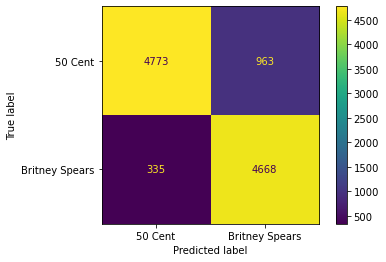

In [24]:
cm = confusion_matrix(y_test, y_predict)    
disp = ConfusionMatrixDisplay(cm, display_labels=['50 Cent', 'Britney Spears'])
disp.plot()

<font color='red'>
More Britney lyrics are missclassified as 50_cent then the other way >> check  Precision-recall curves to choose a more balanced threshhold
</font>

In [28]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

In [29]:
probs = m.predict_proba(X_test_V) 
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])

Area under the curve =  0.9525853177075624


c:\Users\maisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


(0.0, 1.0)

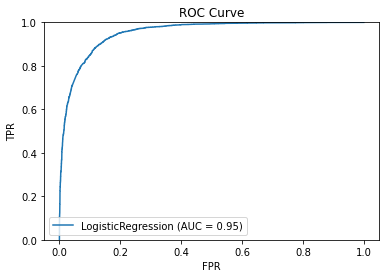

In [30]:
import matplotlib.pyplot as plt
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(m, X_test_V, y_test)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

c:\Users\maisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


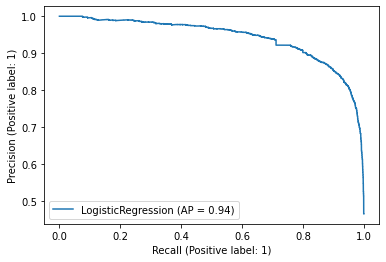

In [31]:
# plot precision and recall curve 
plot_precision_recall_curve(m, X_test_V, y_test)

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:,1])
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.9427295292230499

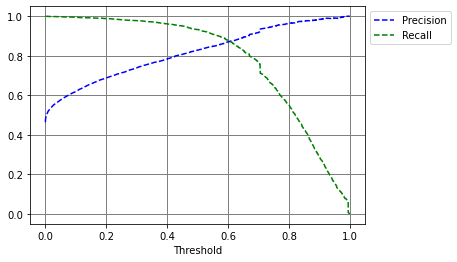

In [33]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()

<font color='red'>
Based on plot - recall==prescision on threshhold=0.6

In [34]:
import numpy as np
from sklearn.preprocessing import binarize

THRESHOLD = 0.6
adapted_y_preds = np.where(m.predict_proba(X_test_V)[:,1] > THRESHOLD, 1, 0)

In [35]:
print(f'The accuracy of the model is: {round(accuracy_score(y_test, adapted_y_preds), 3)}')
print(f'The precision of the model is: {round(precision_score(y_test, adapted_y_preds), 3)}')
print(f'The recall of the model is: {round(recall_score(y_test, adapted_y_preds), 3)}')
print(f'The f1-score of the model is: {round(f1_score(y_test, adapted_y_preds), 3)}')

The accuracy of the model is: 0.882
The precision of the model is: 0.87
The recall of the model is: 0.878
The f1-score of the model is: 0.874


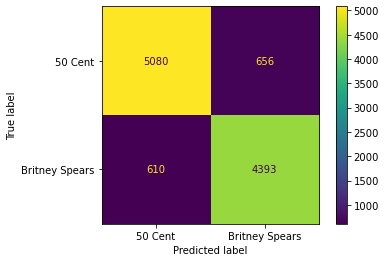

In [36]:
cm = confusion_matrix(y_test, adapted_y_preds)    
disp = ConfusionMatrixDisplay(cm, display_labels=['50 Cent', 'Britney Spears'])
disp.plot()

step 7: extract list of top 20 words for each artist

In [25]:
import operator
import numpy as np
print('top 20 predicting words for Britney')
print(operator.itemgetter(*np.argsort(m.coef_[0]))(vectorizer.get_feature_names())[-20:])
print('')
print('top 20 predicting words for 50 Cent')
print(operator.itemgetter(*np.argsort(m.coef_[0]))(vectorizer.get_feature_names())[:20])

top 20 predicting words for Britney
('care money', 'beat goes', 'look talking', 'prerogative', 'don somethin', 'satisfaction', 'outrageous', 'drop dead', 'gon gon', 'play unit', 'better work', 'say want', 'repeat chorus', 'got know', 'ba', 've got', 'love hate', 'gon pull', 'britney', 'nan')

top 20 predicting words for 50 Cent
('nigga', 'niggas', 'shit', 'bitch', 'ck', 'ass', '50', 'hood', 'fucking', 'bitches', 'motherfucking', 'money', 'eyes repeat', 'disrespectful', 'niggaz', 'krazy', 'unit', 'shots', 'monster', 'street')


c:\Users\maisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
